# Docker Images

___

+ Images
+ Dockerfile
+ Docker Build
+ Containerise applications
+ Demo: Create a Docker image
+ Command v Entry Point

## Docker Fundamentals

__

Here we will learn how to create your own images. That is,  if you cannot find those images on docker hub, or if you decide your dockeroze your application for ease of shipping your application.



We going to container an application that was written using the python flask framework

Quick overview of creating docker image:

1. We create a docker file that contains all the steps to create the image
    - dependencies
    - where to copy the source code
    - what the entry point of the application
2. Then use docker "build" command to build the image
3. Use the docker "push  " to push he local image to docker hub


## Dockerfile
___

Text file written in a specific format:

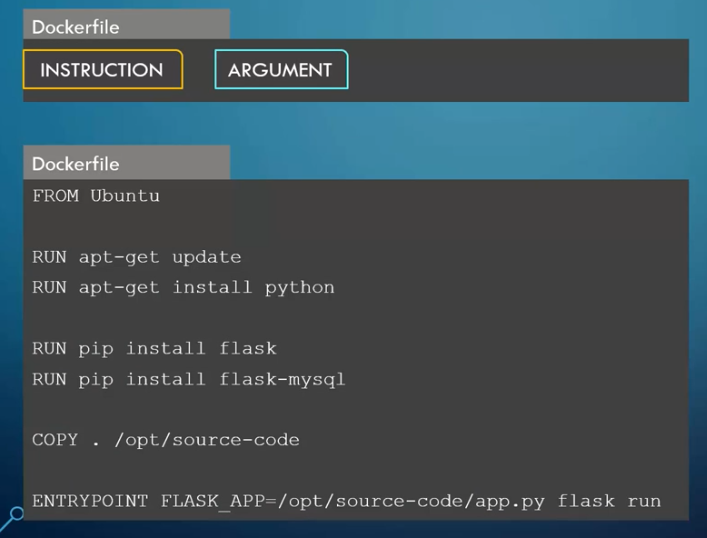

With an instruction and argument format:

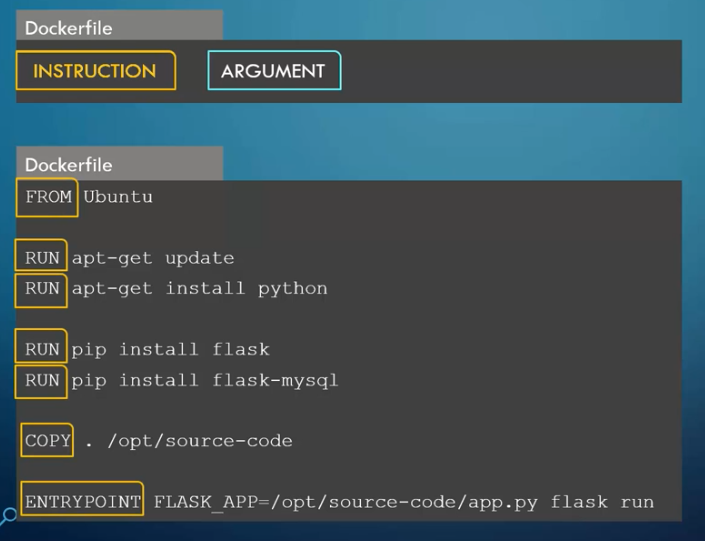

Meaning the instruction is telling docker to perform an action while creating the image

Everying on the right is an argument to the instruction.


First line says what the base os should be for the container. So here we must specify an os or another image.

The run commmand instruction docker to run dependencies on those images.

Copy command copies files from local system, that is the docker host to the docker image to /opt/source-code

Entrypoint allows us to specify a command that we can use when the image is run as a container


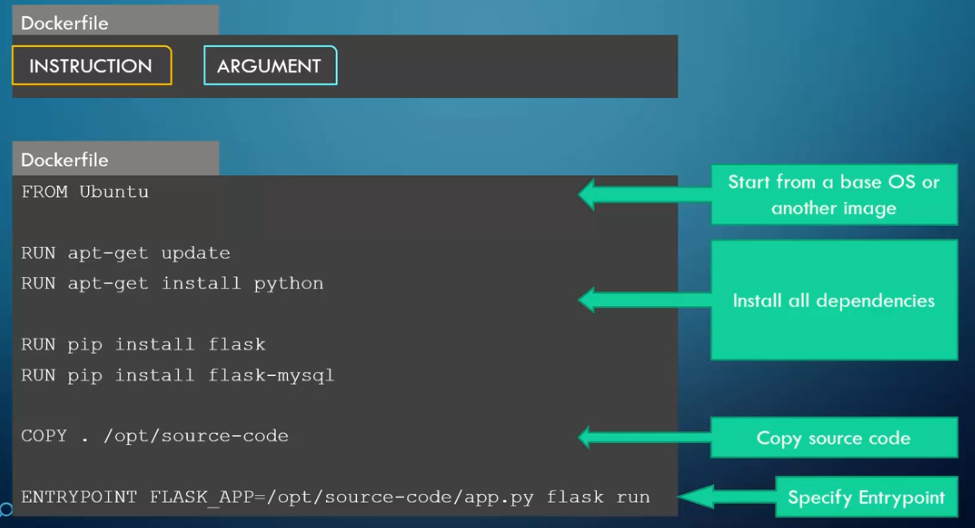

## Docker Build

___

When docker build the images, it builds it in a layered architecture.

```
docker build Dockerfile -t kodekloud/my-custom-app
```

Each line of instruction creates a new layer in image

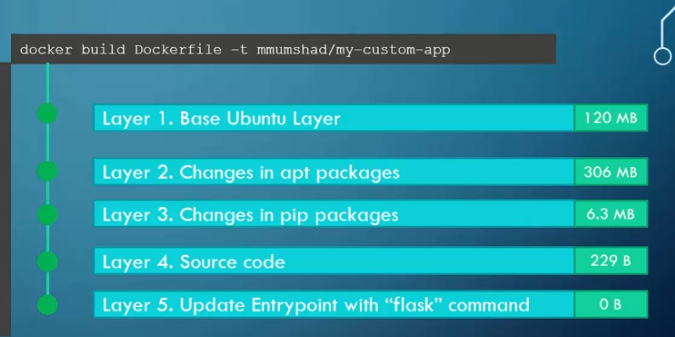

We can see these layers by running using the docker history command:

```
dockerfile history <imagename>

```

All the steps in the buld process is cached. So if any step fails, then it will not start from the beginning but continue bythe failed step (provided you have fixed it) That is it will reuse the previous layers from cache.

Or where you have added additional steps.



##  Containerise applications

___

You can containerize almost everthing: browsers like firefox, utilities like curl, applicatons like spotify.

So when ever someone will need something they will get the image from docker, run the container. And when they done with it, remove the container and image. And dont have to cleanup the system later, what was installed was removed.


## Demo - Dockerfile

___

We have a simple web application written in flask:  https://github.com/mmumshad/simple-webapp-flask.git

We will follow the instructions from github to install.

First we see how to do the steps manually

We first need a base OS, and we want interactive (i) and terminal (t) to run after the image is installed, and bash should be running.

```
docker run -it ubuntu bash
```
Must first run the update

```
apt-get update
```

Install python (ignore the other dependencies for now)

```
apt-get install -y python

```

Install python-pip then flask



Come back to this
```
apt-get install -y python-setuptools python-dev build-essential
apt-get install -y python3-pip
pip3 install flask

```

Run the web server using the flask run command, but need the source code of the application. So we will create a folder here:

```
cat > /opt/app.py
```

Get source code from github, and copy it here

To check it was copied correctly issue:


```
cat /opt/app.py
```

Run the application with:

First go to opt folder, then run

```
FLASK_APP=app.py flask run --host=0.0.0.0
```

So now the flask application is running, how do I acces the web server, since I am inside the image?

The only way is to access the app from the docker host. But we need to inspect, get the internal container ip, then access it from there

```
docker ps (to get running container
docker inspect <container id> (to get internal ip
```

then we can run:

http://172.17.0.2:5000/


Should get a welcome message. And then also type

http://172.17.0.2:5000/how are you

Then get a message back

How do we containerize this app now?

type history inside the container and see the steps that we followed.

then also type


## Summarize the command to build the docker file

____

After the base os installation

Seem to be runnng python2 and python3

```
apt-get update
apt-get install -y python
apt-get install -y python-setuptools python-dev build-essential
apt-get install -y python3-pip
pip3 install flask
Copied the code to /opt/app.py
FLASK_APP=/opt/app.py flask run --host=0.0.0.0
```

Create a folder to hold the application - simple-web-app.

Lets create a Dockerfile and app.py

```
FROM ubuntu

RUN apt-get update
RUN apt-get install -y python
RUN apt-get install -y python-setuptools python-dev build-essential
RUN apt-get install -y python3-pip
pip3 install flask

COPY app.py /opt/app.py

ENTRYPOINT FLASK_APP=/opt/app.py flask run --host=0.0.0.0

```

And app.py

```
import os
from flask import Flask
app = Flask(__name__)

@app.route("/")
def main():
    return "Welcome!"

@app.route('/how are you')
def hello():
    return 'I am good, how about you?'

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=8080)
```

Run the docker build command:


```
docker build .

```


Build it again and give it a tag

```
docker build . -t my-simple-web-appbike
```

If you push it now it will go to the default libary, and not everyone has permission to that account.

So we need to set up the correct organisation. You can only push repositories to your owbn account.

Must tag the image with you account name


```
docker build . -t flyblazedocker/flaskapp
```


Now we was push to docker hub

But need to login first




```
docker login -u flyblazedocker
docker push flyblazedocker/flaskapp
```

Any user in the world can run your application with a simple docker run command.

```
docker run -p 8080:5000 flyblazedocker/flaskapp
```

## Command v Entry Point

____

When run docker container from ubuntu image, it will run then exit immediately.

```
docker run ubuntu

```

Remember a container is to run applicatons or services, not to run os, altough its base of the application. Container only lives along as the application or process inside it is alive.

So, we the website or applicaton stops or crashes the container will also stop.

So who defined what process or application should be running inside a container?

We see the "CMD" command at the end of 

1. CMD["nginx"]
2. CMD["mysql"]

for running nginx or mysql

For the above docker ubuntu container, the default command,  is 

1. CMD["bash"]

Bash is a shell that listens for inputs from a terminal. But ubuntu image puts it there, so we can have an entrypoint

Correct way to interacti with bash

 
```
docker run -it ubuntu bash

```

How can we overwrite or start a different command to start the container? 

1 Append a command to the docker run command. It will override the default cmd specified in dockerfile/image

```
docker run  ubuntu sleep 5000
```

And to make this change permanent. To always run the sleep command, when you run the docker ubuntu image?

You will create your own image (using Dockerfile) from base ubunto image with sleep command at end

```
FROM ubuntu
...
...
CMD sleep 5000
```

or json format

CMD ["command", "parameter"]

 
Then build then new image from new Dockerfile, and tag it

```
docker build . flyblazedocker/ubutti_sleeper
```

Then run the image

```
docker run flyblazedocker/ubutti_sleeper
```

Again you can overwrite this at the command line.

You also get ENTRYPOINT command, subtle difference, also a command that gets run after the run command

```
FROM ubuntu

ENTRYPOINT["sleep"]

```

```
docker run flyblazedocker/ubutti_sleeper 10
```

Will end up been: ```sleep 10```

So if we run it without 10, we will get an error.

```
docker run flyblazedocker/ubutti_sleeper

```

CMD has command + parameter
ENTRYPOINT has command, and you specify the parameter when you issue the run command.

In order to make sure the user forgot to specify 10, we can do


```
ENTRYPOINT["sleep"]
CMD["5"]
```

And if we need to override the "sleep" command we can do it in the run command"

```
docker run --entrypoint sleep2,0 flyblazedocker/ubutti_sleeper 10
``